In [ ]:
# General analysis of Mall Customer Segmentation.



My aim is to exercise the fresh acquired knowledge regarding the usage of the Seaborn, Pandas, Numpy and Matplotlib libraries, aswell as the Jupyter Notebook tools, while explaining the analysis step by step

The dataset comprises of the following information:

Customer ID
Gender
Age
Annual Income (k$)
Spending Score - Assigned by the mall, based on behavior and spending nature
Some of the questions we might answer:

What age is higher in density when it comes to customers?
What sex is higher in density to the customer population?
What relation does the spending score has to the customer's age?
Is there a relation between the Spending Score and the Annual Income?





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # Defining the standard figure size
import seaborn as sns
import os

In [7]:
#Importing the CSV document:

file = pd.read_csv('/Users/ogundalu/Downloads/Mall_Customers.csv')

In [8]:
#Checking if the document was uploaded correctly and taking a look at how it is shown:
file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#Check if theres any null spaces in the data frame
file.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
#check the min and max values for the column Age:
file['Age'].min()

18

In [13]:
file['Age'].max()

70

In [14]:
file.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
#Renaming the columns CustomerID and Annual Income for easier navigation:
file.rename(columns={'CustomerID':'ID','Annual Income (k$)':'Annual Income','Genre':'Gender'}, inplace=True)

In [17]:
file.describe()

,ID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
#What age is higher in density when it comes to customers?
file_ages = file[['ID','Age']]
file_ages.head()

,ID,Age
0,1,19
1,2,21
2,3,20
3,4,23
4,5,31


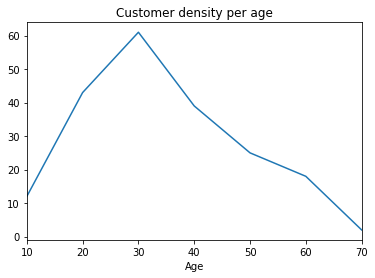

Age
10    12
20    43
30    61
40    39
50    25
60    18
70     2
Name: ID, dtype: int64


In [20]:
age = file_ages.groupby((file_ages.Age//10*10))['ID'].count()
plt.title('Customer density per age')
age.plot()
plt.show()
print(age)

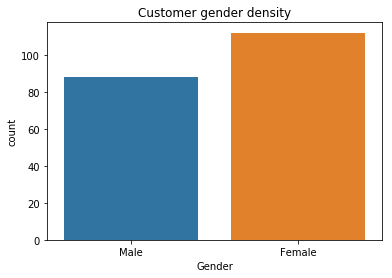

Gender
Female    112
Male       88
Name: ID, dtype: int64


In [21]:
#What sex is higher in density to the customer population
sns.countplot(x='Gender', data=file)
plt.title('Customer gender density')
plt.show()
print(file.groupby(['Gender'])['ID'].count())

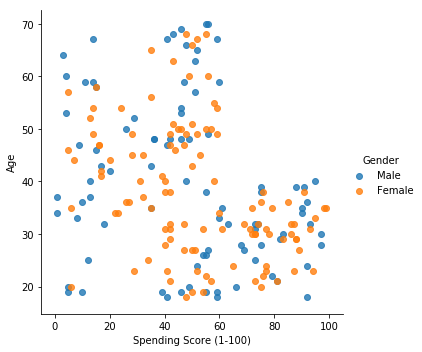

In [22]:
# What relation does the spending score has to the customer's age
sns.lmplot(x='Spending Score (1-100)', 
           y='Age', data=file, 
           fit_reg=False, 
           hue='Gender')

(-1, 100)

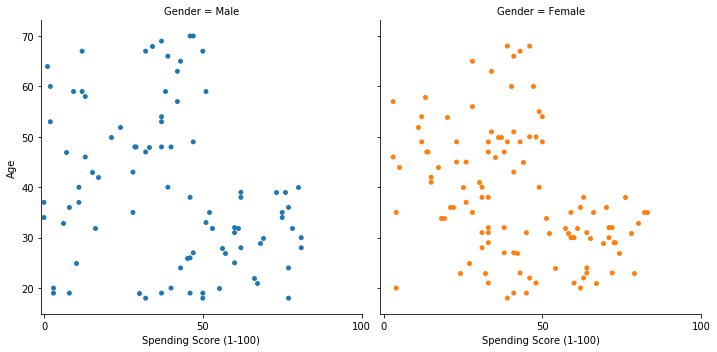

In [23]:
It is possible to show the plot with more details,
separating them by Gender in two plots:
    
sns.catplot(x='Spending Score (1-100)', 
            y='Age', 
            data=file, 
            col='Gender', 
            kind='swarm',
            hue='Gender')
x_axis = [0,50,100]
x_lab = ['0','50','100']
plt.xticks(x_axis,x_lab)
plt.xlim(-1, 100)

<Figure size 1080x1080 with 0 Axes>

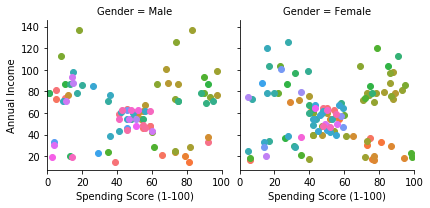

<Figure size 1080x1080 with 0 Axes>

In [24]:
create two plots, separated by gender, 
to better view the distribution of this correlation:
    
s = sns.FacetGrid(file, col='Gender', hue='Age')
s.map(plt.scatter, 'Spending Score (1-100)','Annual Income')
plt.xlim(0, 100)
plt.figure(figsize=(15, 15))

(-1, 100)

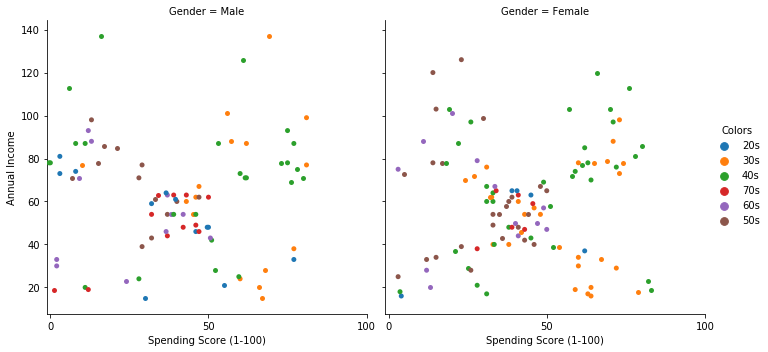

In [25]:
# Setting up colors to represent the decades in the plot
conditions = [
    (file['Age'] > 0) & (file['Age'] <= 20),
    (file['Age'] > 20) & (file['Age'] <= 30),
    (file['Age'] > 30) & (file['Age'] <= 40),
    (file['Age'] > 40) & (file['Age'] <= 50),
    (file['Age'] > 50) & (file['Age'] <= 60),
    (file['Age'] > 60)]
choices = ['20s', '30s', '40s', '50s', '60s', '70s']
file['Colors'] = np.select(conditions, choices, default='black')

sns.catplot(x='Spending Score (1-100)', 
            y='Annual Income', 
            data=file, 
            col='Gender', 
            kind='swarm',
            hue='Colors')
x_axis = [0,50,100]
x_lab = ['0','50','100']
plt.xticks(x_axis,x_lab)
plt.xlim(-1, 100)

In [ ]:
Conclusion
From this analysis, i can conclude that:
    
Most of the customer population is comprised by middle aged people,
and the older the population gets, the less they tend 
to go to the mall.

There is a considerable difference to the men/women rate.
Women comprises the largest part of the population of customers.

By considering the Spending Score set by the mall, we can see 
that younger and middle aged people tend to buy more, while 
older people does so less frequently.

It is possible to note that there is a cluter of occurrences, 
in both genders, when it comes to Annual Income and Spending Score,
which means that the average Spending Score is related to the income 
of 40k to 70k.

